In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
img_rows, img_cols = 28, 28

# The number of training samples per batch. 128 is a reasonable number.
batch_size = 128

# Our data set contains 10 digits, so the number of classes is 10
num_classes = 10

# epochs is the number of times the model is trained with the data set, more can be better, up to a point
epochs = 20

# dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.5

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

original_test = x_test

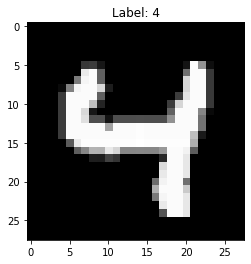

In [5]:
index = random.randrange(1000)
plt.imshow(original_test[index], cmap='gray')
plt.title('Label: %d' % y_test[index])
plt.show()

In [6]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 24s 399us/sample - loss: 0.2317 - accuracy: 0.9296 - val_loss: 0.0490 - val_accuracy: 0.9846
Epoch 2/20
60000/60000 [==============================] - 12s 196us/sample - loss: 0.0840 - accuracy: 0.9753 - val_loss: 0.0362 - val_accuracy: 0.9877
Epoch 3/20
60000/60000 [==============================] - 12s 197us/sample - loss: 0.0631 - accuracy: 0.9813 - val_loss: 0.0370 - val_accuracy: 0.9877
Epoch 4/20
60000/60000 [==============================] - 12s 202us/sample - loss: 0.0516 - accuracy: 0.9844 - val_loss: 0.0309 - val_accuracy: 0.9892
Epoch 5/20
60000/60000 [==============================] - 12s 201us/sample - loss: 0.0427 - accuracy: 0.9865 - val_loss: 0.0276 - val_accuracy: 0.9910
Epoch 6/20
60000/60000 [==============================] - 12s 201us/sample - loss: 0.0376 - accuracy: 0.9886 - val_loss: 0.0260 - val_accuracy: 0.9911
Epoch 7/20
60000/60000 [====================

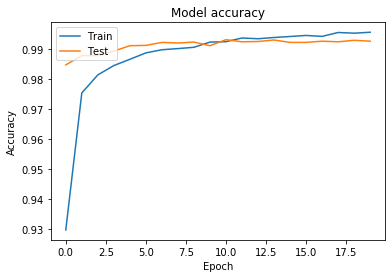

In [8]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:
predictions = model.predict(x_test)
most_likely = predictions.argmax(1)

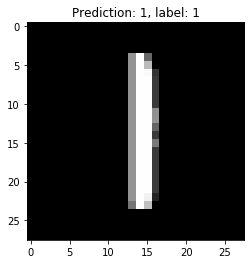

In [11]:
index = random.randrange(10000)
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.imshow(original_test[index], cmap='gray')
plt.show()

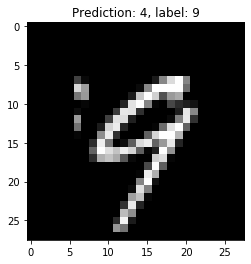

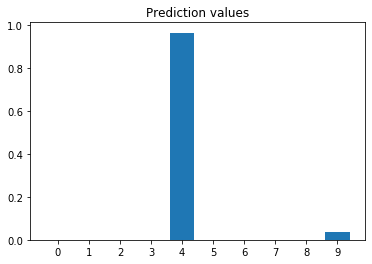

In [14]:

for i in range(10000):
    index = random.randrange(10000)
    if most_likely[index] != y_test[index]:
        break

plt.imshow(original_test[index], cmap='gray')
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.show()

plt.bar(range(10), predictions[index], tick_label=range(10))
plt.title('Prediction values')
plt.show()

In [15]:
total = 0.0
misclassified = 0.0
for i in range(10000):
    total += 1
    if most_likely[i] != y_test[i]:
        misclassified += 1
print('Error rate: %.2f %%' % (100.0*misclassified/total))

Error rate: 0.75 %
